**DECISION TREES ON SPOTIFY DATASET**


In [7]:


import pandas as pd

# Dummy model and Decision Tree Classifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import(
    cross_validate,
    train_test_split
)
from sklearn.tree import (
    DecisionTreeClassifier,
    export_graphviz
)

# Visualization in the EDA section
import altair as alt
alt.renderers.enable('kaggle')
import seaborn as sns

# Visualizing the final tree diagram
import re
import graphviz
from IPython.display import Image

In [10]:
df = pd.read_csv('song_data_final.csv', index_col=0)



In [11]:
df

,Title,Artist,Top Genre,Year,BPM,Energy,Danceability,Loudness_db,Liveness,Valence,...,Genre_latin,Genre_mellow gold,Genre_metal,Genre_opera,Genre_pop,Genre_punk,Genre_reggae,Genre_rock,Genre_singer-songwriter,Genre_soul
0,Sunrise,Norah Jones,pop,2004,157,30,53,-14,11,68,...,0,0,0,0,1,0,0,0,0,0
1,Black Night,Deep Purple,rock,2000,135,79,50,-11,17,81,...,0,0,0,0,0,0,0,1,0,0
2,Clint Eastwood,Gorillaz,hip hop/rap,2001,168,69,66,-9,7,52,...,0,0,0,0,0,0,0,0,0,0
3,The Pretender,Foo Fighters,alternative,2007,173,96,43,-4,3,37,...,0,0,0,0,0,0,0,0,0,0
4,Waitin' On A Sunny Day,Bruce Springsteen,rock,2002,106,82,58,-5,10,87,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,...,0,0,0,0,0,0,0,0,0,0
1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,...,0,0,0,0,0,0,0,0,0,0
1992,Johnny B. Goode,Chuck Berry,rock,1959,168,80,53,-9,31,97,...,0,0,0,0,0,0,0,1,0,0
1993,Take Five,The Dave Brubeck Quartet,jazz,1959,174,26,45,-13,7,60,...,0,0,0,0,0,0,0,0,0,0


In [12]:
spotify_df=df.drop(columns=["Genre_adult standards", "Genre_cabaret", "Genre_carnaval limburg", "Genre_celtic", "Genre_chanson", "Genre_classic", "Genre_country/americana", "Genre_dance", "Genre_disco", "Genre_downtempo", "Genre_folk", "Genre_funk", "Genre_gabba", "Genre_hip hop/rap", "Genre_indie", "Genre_jazz", "Genre_latin", "Genre_mellow gold", "Genre_metal", "Genre_opera", "Genre_reggae", "Genre_rock", "Genre_singer-songwriter", "Genre_soul"], axis = 1)
spotify_df

,Title,Artist,Top Genre,Year,BPM,Energy,Danceability,Loudness_db,Liveness,Valence,...,Acousticness,Speechiness,Popularity,Total Followers,yrs_since_release,word_count_in_title,Genre_alternative,Genre_blues,Genre_pop,Genre_punk
0,Sunrise,Norah Jones,pop,2004,157,30,53,-14,11,68,...,94,3,71,2152743,15,1,0,0,1,0
1,Black Night,Deep Purple,rock,2000,135,79,50,-11,17,81,...,17,7,39,3080343,19,2,0,0,0,0
2,Clint Eastwood,Gorillaz,hip hop/rap,2001,168,69,66,-9,7,52,...,2,17,69,5402898,18,2,0,0,0,0
3,The Pretender,Foo Fighters,alternative,2007,173,96,43,-4,3,37,...,0,4,76,7461956,12,2,1,0,0,0
4,Waitin' On A Sunny Day,Bruce Springsteen,rock,2002,106,82,58,-5,10,87,...,1,3,59,3079845,17,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,...,84,7,63,4126195,61,2,0,0,0,0
1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,...,73,6,69,4126195,61,2,0,0,0,0
1992,Johnny B. Goode,Chuck Berry,rock,1959,168,80,53,-9,31,97,...,74,7,74,1102795,60,3,0,0,0,0
1993,Take Five,The Dave Brubeck Quartet,jazz,1959,174,26,45,-13,7,60,...,54,4,65,136077,60,2,0,0,0,0


In [13]:
train_df, test_df = train_test_split(spotify_df,
                                     train_size=0.8,
                                     random_state=2021)

In [14]:
spotify_df.shape

(1995, 21)

Total data frame = 1995 datapoints

In [15]:
train_df.shape

(1596, 21)

train data (80%) = 1596 datapoints

In [16]:
test_df.shape

(399, 21)

In [17]:
corr_df = train_df.corr('spearman').stack().reset_index(name='corr')
corr_df.loc[corr_df['corr'] == 1, 'corr'] = 0  # Remove diagonal
# Use abs so that we can visualize the impact of negative correaltion  
corr_df['abs'] = corr_df['corr'].abs()
corr_df.sort_values('abs', ascending=False)

<ipython-input-17-a473aa2ed542>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = train_df.corr('spearman').stack().reset_index(name='corr')


,level_0,level_1,corr,abs
216,yrs_since_release,Year,-1.000000,1.000000
12,Year,yrs_since_release,-1.000000,1.000000
74,Loudness_db,Energy,0.730892,0.730892
40,Energy,Loudness_db,0.730892,0.730892
44,Energy,Acousticness,-0.629086,0.629086
...,...,...,...,...
209,Total Followers,Total Followers,0.000000,0.000000
228,yrs_since_release,yrs_since_release,0.000000,0.000000
247,word_count_in_title,word_count_in_title,0.000000,0.000000
266,Genre_alternative,Genre_alternative,0.000000,0.000000


In [18]:
alt.Chart(corr_df).mark_circle().encode(
    x='level_0',
    y='level_1',
    size='abs',
    color=alt.Color('corr',
                    scale=alt.Scale(scheme='blueorange',
                                    domain=(-1, 1))))

alt.Chart(...)

test data(20%) = 399 datapoints

In [19]:
#colsx = ['Genre_pop','Danceability', 'Total Followers','Loudness_db','Acousticness','Speechiness','Valence', 'Genre_punk']
colsx= ['Loudness_db', 'yrs_since_release', 'Energy']
X= spotify_df[colsx]

colsy= ['Popularity']
Y= spotify_df[colsy]
X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size=0.8, test_size=0.2, random_state=123)


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def cross_validate_return(X_train, y_train, depth):
  model = DecisionTreeClassifier(max_depth=depth, random_state=123)
  scores = cross_validate(model, X_train, y_train, return_train_score=True, cv=10)
  return_df = pd.DataFrame(pd.DataFrame(scores).mean()).iloc[2:].T
  return [round(return_df.train_score[0], 3),round(return_df.test_score[0],3), depth]
data = []
i = 1
while i < 10:
    data.append(cross_validate_return(X_train, y_train, i))
    i += 1
df = pd.DataFrame(data, columns=['train_score', 'validation_score',
                  'max_depth'])
df.head(n=10)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

,train_score,validation_score,max_depth
0,0.038,0.034,1
1,0.045,0.034,2
2,0.057,0.038,3
3,0.068,0.041,4
4,0.085,0.033,5
5,0.109,0.029,6
6,0.143,0.034,7
7,0.188,0.031,8
8,0.247,0.031,9


In [22]:
cv_df = df.melt(value_vars=(["train_score", "validation_score"]), id_vars=["max_depth"])
cv_df.head()


,max_depth,variable,value
0,1,train_score,0.038
1,2,train_score,0.045
2,3,train_score,0.057
3,4,train_score,0.068
4,5,train_score,0.085


In [23]:
optimal_depth = df.max_depth[df.validation_score.argmax()]

print("We pick the value where the cross-validation error is "
      "minimum (or the cross-validation score is the highest)"
      f" at max_depth = {optimal_depth}")

We pick the value where the cross-validation error is minimum (or the cross-validation score is the highest) at max_depth = 4


In [24]:
print(f"Validation score at optimal depth: {df.validation_score[3]}")

Validation score at optimal depth: 0.041


In [25]:
optimal_model = DecisionTreeClassifier(max_depth=optimal_depth)
optimal_model.fit(X_train, y_train)
print(f"Score on test set: { optimal_model.score(X_test, y_test):.3f}")


Score on test set: 0.020


In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=0.01)

In [27]:
clf = clf.fit(X_train, y_train)


In [28]:
predictions = clf.predict(X_test)
predictions

array([69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69,
       69, 69, 69, 69, 69

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.03007518796992481

In [30]:
def display_tree(feature_names, tree, counts=False):
    """For binary classification only"""
    dot = export_graphviz(
        tree,
        out_file=None,
        feature_names=feature_names,
        class_names=tree.classes_.astype(str),
        impurity=False,
    )
    if counts:
        dot = re.sub("(samples = [0-9]+)\\\\n", "", dot)
      
    else:
        dot = re.sub(
            "(\\\\nsamples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])", "", dot
        )
        dot = re.sub(
            "(samples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])\\\\n", "", dot
        )
    return graphviz.Source(dot)

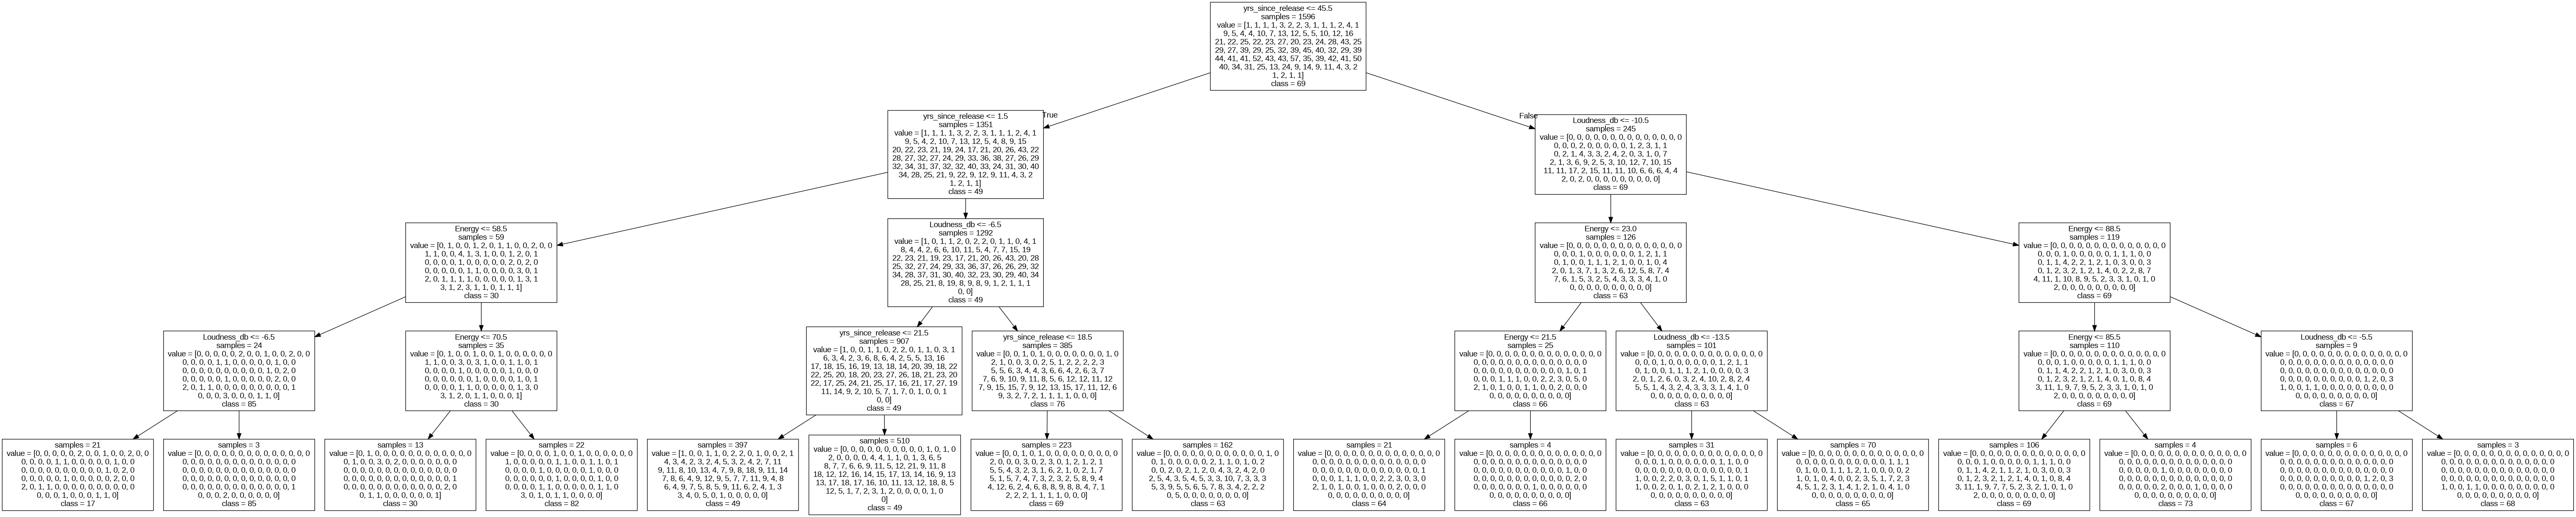

In [31]:
Image(display_tree(X_train.columns, optimal_model).pipe("png"))

**Conclusions:**


1.   Correlation across the various attributes were plotted and the highly correlated variables with Popularity was found.
2. The Test set and the Training set was splitted with the feature variables and the Target Variable.
3. The **Maximum Depth **was found to be **4** using cross validation
4. With the help of the Training Dataset and the Test Data set the Decision Tree was generated.
5. From the Decision Tree **Loudness, Years_since_release , Energy **was the most that contributed to the **Popularity of the Songs** from the Dataset.